In [1]:
from deepom.figures import *

Images_FigureData().make_figure_data()
data = Images_FigureData.load_figure_data()

selected: 0it [00:00, ?it/s]

crop_sizes [600000.]


crops: 0it [00:00, ?it/s]

qry items:   0%|          | 0/2 [00:00<?, ?it/s]

BasicUNet features: (32, 32, 64, 128, 256, 32).
loading checkpoint:  /home/ynogin/out/LocalizerModule/LocalizerModule-20220904-therapeutic-finch/checkpoint.pickle 




alignments:   0%|          | 0/48 [00:00<?, ?it/s]

len(self.spaligner_items)=1


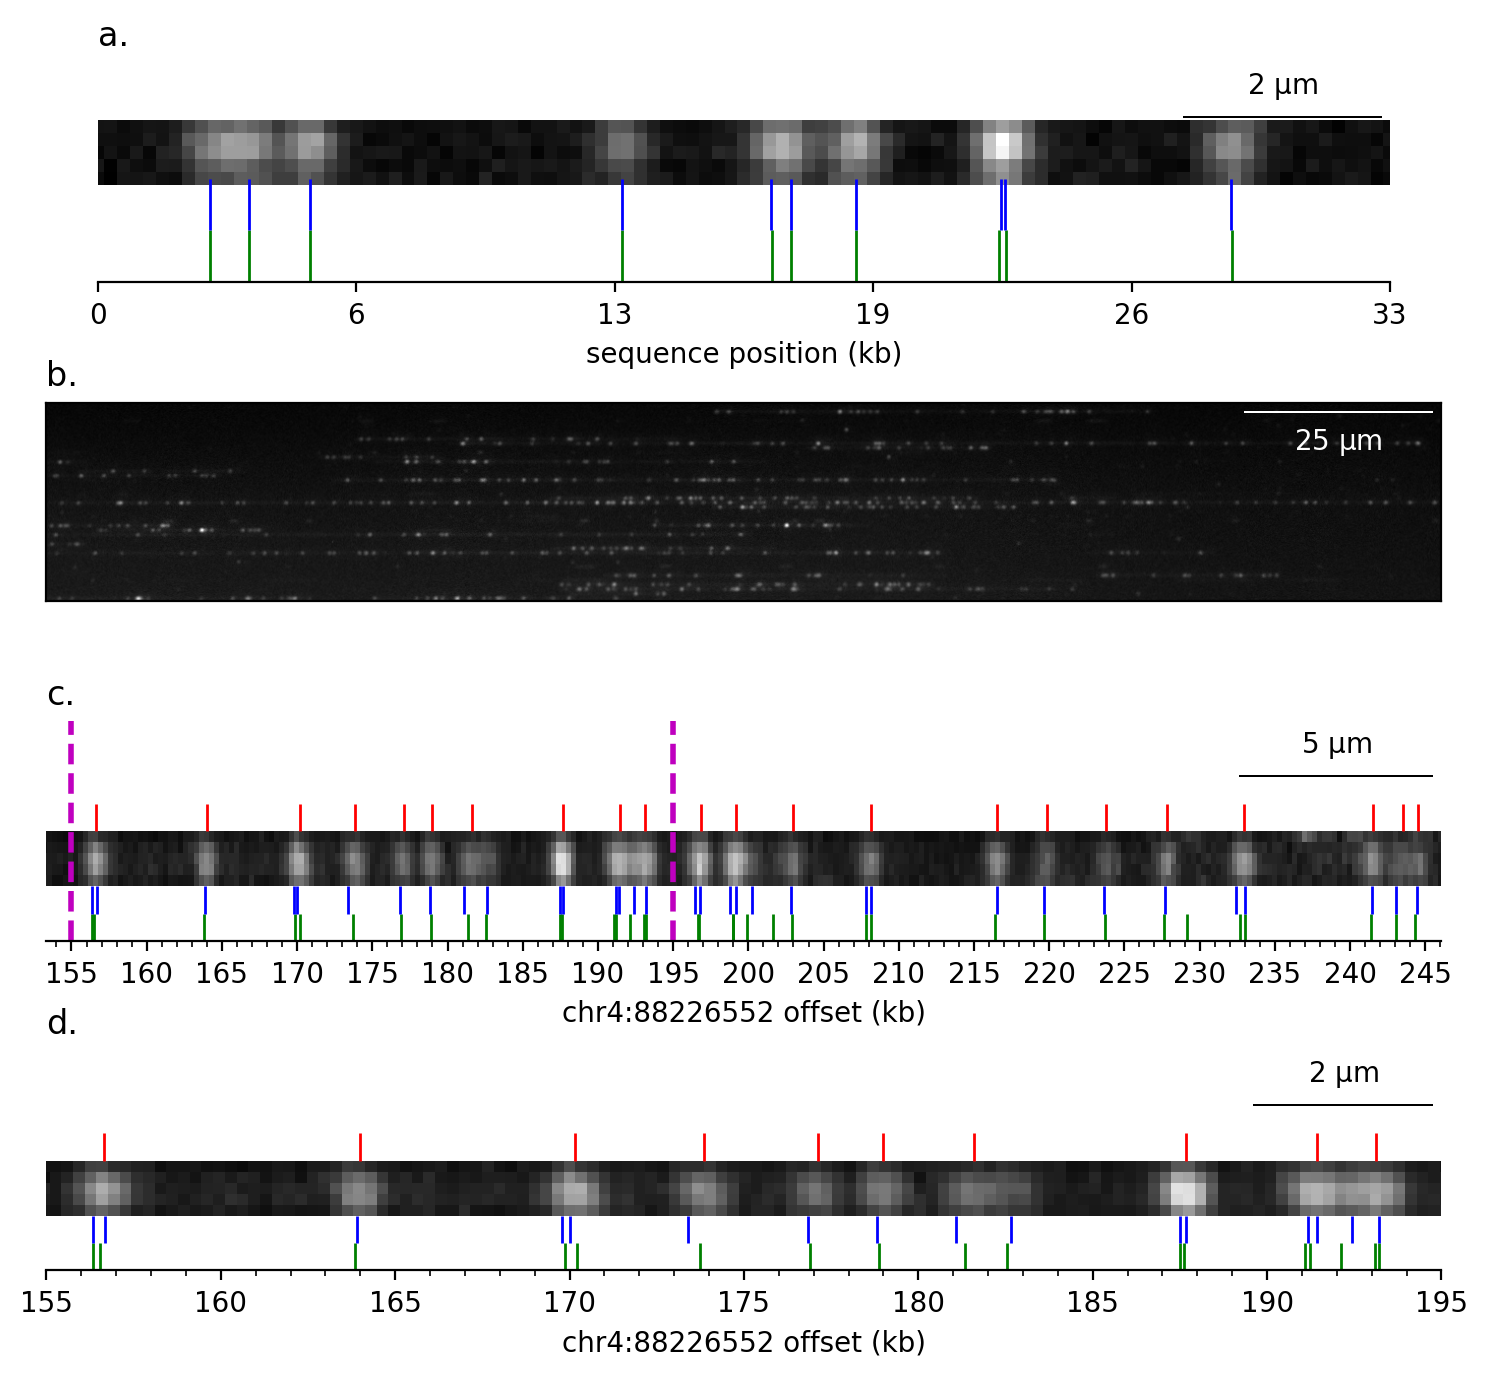

In [7]:
from matplotlib.ticker import MultipleLocator
from matplotlib_scalebar.scalebar import ScaleBar

data_item = data.data_item
item = data.item
refs = data.refs
inference_item = data.inference_item

scalebar_scale = 130e-9

_, axs = pyplot.subplots(figsize=(9, 8), dpi=200, nrows=4, gridspec_kw=dict(height_ratios=[1,1,1, 1], hspace=.5))

titles = [
    "a.",
    "b.",
    "c.",
    "d.",
]

for ax, title in zip(axs, titles):
    ax.set_title(title, loc="left")

pyplot.sca(axs[0])

image = data_item.image[0]
labeled_pos = data_item.labeled_coords.T[1]

pyplot.imshow(image, cmap="gray")
pyplot.eventplot([inference_item.loc_pred, labeled_pos], lineoffsets=[-6, -2], colors=["g", "b"], linewidths=1, linelengths=4)

set_only_x_visible()
set_formatter(lambda x, _: int((x * data_item.scale) / 1000))
pyplot.gca().invert_yaxis()
pyplot.gca().add_artist(ScaleBar(scalebar_scale, color="k", box_alpha=0, scale_loc="top"))
pyplot.xlabel("sequence position (kb)")
pyplot.xlim(0, 100)
pyplot.ylim(-8, 9)

pyplot.sca(axs[1])

pyplot.imshow(item.crop_item.parent_bnx_item.bionano_image.segment_image[0], cmap="gray")

pyplot.gca().add_artist(ScaleBar(scalebar_scale, color="w", box_alpha=0))

ax = pyplot.gca()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

pyplot.sca(axs[2])

ilims = 29, 60
margin = 3e3

rvec = refs[item.ref_id]
qvec = item.qry_item.qry

lims = max(0, item.alignment_ref[ilims[0]] - margin), min(rvec.max(), item.alignment_ref[ilims[1]] + margin)
rvec_show = rvec[slice(*rvec.searchsorted(lims))]
offset = item.alignment_ref[ilims[0]] - item.alignment_qry[ilims[0]]
mol_offset = lims[0] - offset
scale = item.qry_item.scale

im_displ = item.qry_item.inference_item.image_input
im_displ = rescale_intensity(im_displ)


def plot_molecule():
    pyplot.gca().pcolorfast((0, im_displ.shape[-1] * scale), (1, 2), im_displ, cmap='gray')
    pyplot.eventplot(item.crop_item.pixel_locs * scale, lineoffsets=[2.25], colors=["r"], linewidths=1, linelengths=.5)
    pyplot.eventplot([rvec_show - offset, item.alignment_qry], lineoffsets=[0, .75], colors=["g", "b"], linelengths=[1, .5], linewidths=1)
    
    pyplot.xlim(lims[0] - offset, lims[1] - offset)
    pyplot.ylim(0, 4)
    set_only_x_visible()
    set_formatter(lambda x, _: int(x / 1000))
    ax = pyplot.gca()
    ax.xaxis.set_major_locator(MultipleLocator(5000))
    ax.xaxis.set_minor_locator(MultipleLocator(1000))

    pyplot.gca().add_artist(ScaleBar(scalebar_scale / scale, color="k", box_alpha=0, scale_loc="top"))
    pyplot.xlabel(f"chr{item.ref_id}:{int(offset)} offset (kb)")
    
plot_molecule()

zoom_lims = 155 * 1000, 195 * 1000
for z in zoom_lims:
    pyplot.axvline(z, ls="--", c="m", lw=2)

pyplot.sca(axs[3])
plot_molecule()

pyplot.xlim(*zoom_lims)
for ext in [".pdf", ".jpg"]:
    # timestamp_str_iso_8601()
    pyplot.savefig(Path("../figures") / ("images_figure" + ext))